# 일반적인 셋 커버

In [24]:
def set_cover(U, s):
    uncovered = U
    covered = []

    while uncovered:
        best_set = max(s, key=lambda x: len(uncovered.intersection(set(x))))
        covered.append(best_set)
        uncovered -= set(best_set)
    return covered

In [25]:
U = {1, 2, 3, 4, 5, 6, 7, 8, 9}
S = [{1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 7}, {3, 5, 6, 8, 9}, {6, 9}]
result = set_cover(U, S)
print(result)

[{1, 2, 3, 4, 5, 6}, {3, 5, 6, 8, 9}, {1, 2, 4, 5, 7}]


## 최적해에 더 근접하는 개선된 셋커버

In [26]:
# 요소의 고유갑 구하기
def find_eigen(sets):
    fre = {}
    for subset in sets:
        for element in subset:
            if element in fre:
                fre[element] += 1
            else:
                fre[element] = 1
    return fre

# 초기의 길이를 저장
#(부분집합이 univer에 포함되기 때문에 부분집합이 가지는 갯수만 구하여도 가장 큰 값이 가장 그리디한 선택이 될수있음)
def find_initialsizes(sets):
    initial_sizes = {}
    for i, subset in enumerate(sets):
        initial_sizes[i+1] = len(subset)
    return initial_sizes

def set_cover_improved(universe, sets):
    uncovered = universe
    result = [] # 결과값이 담길 공간
    while uncovered: # univer가 존재하면 계속 반복하여 모든 요소를 커버해라
        bestSubset = {}
        bestCovered = {}
        for subset in sets:
            covered = subset & uncovered
            if len(covered) > len(bestCovered):
                bestSubset = subset 
                bestCovered = covered

        # 중복되는 그리디값이 있다면 초기의 길이가 긴것을 저장
        if len([subset for subset in sets if len(subset & uncovered) == len(bestCovered)])>1:
            initialSizes = find_initialsizes(sets)
            bestSubset = max([subset for subset in sets if len(set(subset) & uncovered) == len(bestCovered)],
                             key=lambda x: initialSizes[sets.index(x)+1])
        
        result.append(bestSubset)
        uncovered -= bestCovered

    frequencies = find_eigen(result)
    # 선택된 값들 중 고유값을 포함하지 않는 집합들을 삭제하는 과정
    for subset in result:
        if all(frequencies[element] != 1 for element in subset):
            result.remove(subset)

    return result

In [37]:
U = {1, 2, 3, 4, 5, 6, 7, 8, 9}
s = [{1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 7}, {3, 5, 6, 8, 9}, {6, 9}]
result = set_cover_improved(U, s)
print('개선된 셋커버: ', result)

개선된 셋커버:  [{3, 5, 6, 8, 9}, {1, 2, 4, 5, 7}]


## 그리디와 improved 그리디 난수환경 비교

#### 조금더 이해하기 쉽게 설계된 코드는 해당 환경에서 동작 오류가 남(아래도 다 오류가 날꺼 같으므로 최종본 확인)

In [38]:
import random
from collections import defaultdict

# 난수 환경 생성
def generate_sets(num_points, probability, num_sets):
    universe = set(range(1, num_points + 1))
    sets = []
    for _ in range(num_sets):
        new_set = set()
        for point in range(1, num_points + 1):
            if random.random() <= probability:
                new_set.add(point)
        sets.append(new_set)
    return sets, universe

num_points = 100  # 요소 개수 
num_sets = 100  # 부분 집합 개수
probability = 0.3  # 부분 집합이 집합의 각 요소를 포함할 확률
n = 1000  # 반복 실행 횟수

greedy_set_totals = defaultdict(int)
improved_set_totals = defaultdict(int)

for _ in range(n):
    sets, universe = generate_sets(num_points, probability, num_sets)
    greedy_cover = set_cover(universe, sets)
    improved_cover = set_cover_improved(universe, sets)
    greedy_set_totals[len(greedy_cover)] += 1
    improved_set_totals[len(improved_cover)] += 1

sorted_greedy_totals = sorted(greedy_set_totals.items(), key=lambda x: x[0])
sorted_improved_totals = sorted(improved_set_totals.items(), key=lambda x: x[0])

for length, count in sorted_greedy_totals:
    print(f'set_total이 {length}인 경우의 개수 (그리디 알고리즘): {count}')

print("="*50)
    
for length, count in sorted_improved_totals:
    print(f'set_total이 {length}인 경우의 개수 (개선된 알고리즘): {count}')

set_total이 5인 경우의 개수 (그리디 알고리즘): 46
set_total이 6인 경우의 개수 (그리디 알고리즘): 875
set_total이 7인 경우의 개수 (그리디 알고리즘): 79
set_total이 4인 경우의 개수 (개선된 알고리즘): 8
set_total이 5인 경우의 개수 (개선된 알고리즘): 174
set_total이 6인 경우의 개수 (개선된 알고리즘): 778
set_total이 7인 경우의 개수 (개선된 알고리즘): 40


# 수행시간 비교

#### n번 반복하는 난수 환경에서도 작동되게 다시 코딩

In [39]:
def calculateSubsetFrequencies(sets):
    frequencies = {}
    for subset in sets:
        for element in subset:
            if element in frequencies:
                frequencies[element] += 1
            else:
                frequencies[element] = 1

    return frequencies


def calculateSubsetInitialSizes(sets):
    initial_sizes = {}
    for i, subset in enumerate(sets):
        initial_sizes[i+1] = len(subset)

    return initial_sizes


def set_cover_improved(universe, sets):
    universe = universe
    for subset in sets:
        universe |= set(subset)

    optimalCover = []
    while universe:
        bestSubset = None
        bestCovered = set()
        for subset in sets:
            covered = set(subset) & universe
            if len(covered) > len(bestCovered):
                bestSubset = subset
                bestCovered = covered

        if bestSubset is None:
            break

        if len([subset for subset in sets if len(set(subset) & universe) == len(bestCovered)]) > 1:
            initialSizes = calculateSubsetInitialSizes(sets)
            bestSubset = max([subset for subset in sets if len(set(subset) & universe) == len(bestCovered)],
                             key=lambda x: initialSizes[sets.index(x)+1])
        
        optimalCover.append(bestSubset)
        universe -= bestCovered
        sets.remove(bestSubset)

    frequencies = calculateSubsetFrequencies(optimalCover)
    updatedOptimalCover = []
    deletedOptimalCover = []

    for subset in optimalCover:
        if any(frequencies[element] == 1 for element in subset):
            updatedOptimalCover.append(subset)
        elif all(frequencies[element] != 1 for element in subset):
            deletedOptimalCover.append(subset)

    return updatedOptimalCover


## 일반적인 그리디 알고리즘

In [40]:
import time
import random
import pandas as pd

# 입력 크기에 따른 실행 시간 측정
#input_sizes = list(range(1000, 4001, 1000))
input_sizes = list(range(1000, 8001, 500))
execution_times = []
random.seed(42)
for size in input_sizes:
    universe = set(range(1, size+1))
    sets = []
    for _ in range(size):
        subset_size = random.randint(1, size//2)  # 부분집합 크기를 랜덤하게 선택
        subset = set(random.sample(universe, subset_size))  # 부분집합 생성
        sets.append(subset)
        
    start_time = time.time()
    set_cover(universe, sets)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# 결과 표 출력
set_time = pd.DataFrame({'Input Size': input_sizes, 'Execution Time': execution_times})
print(set_time)

C:\Users\User\AppData\Local\Temp\ipykernel_1264\3982431076.py:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = set(random.sample(universe, subset_size))  # 부분집합 생성


    Input Size  Execution Time
0         1000        0.080312
1         1500        0.223253
2         2000        0.369777
3         2500        0.452992
4         3000        0.702955
5         3500        0.984116
6         4000        1.428146
7         4500        1.965166
8         5000        2.507971
9         5500        2.900925
10        6000        3.420293
11        6500        4.020677
12        7000        4.561842
13        7500        5.156755
14        8000        5.779872


## 개선된 그리디 알고리즘

In [41]:
import time
import random
import pandas as pd

input_sizes = list(range(1000, 8001, 500))
execution_times = []
random.seed(42)
for size in input_sizes:
    universe = set(range(1, size+1))
    sets = []
    for _ in range(size):
        subset_size = random.randint(1, size//2)  # 부분집합 크기를 랜덤하게 선택
        subset = set(random.sample(universe, subset_size))  # 부분집합 생성
        sets.append(subset)
        
    start_time = time.time()
    set_cover_improved(universe, sets)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# 결과 표 출력
improved_set_time = pd.DataFrame({'Input Size': input_sizes, 'Execution Time': execution_times})
print(improved_set_time)

C:\Users\User\AppData\Local\Temp\ipykernel_1264\1473673077.py:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = set(random.sample(universe, subset_size))  # 부분집합 생성


    Input Size  Execution Time
0         1000        0.187437
1         1500        0.540328
2         2000        0.734201
3         2500        1.187218
4         3000        1.577757
5         3500        2.624375
6         4000        4.077150
7         4500        3.929932
8         5000        6.567242
9         5500        7.935618
10        6000        8.904137
11        6500        9.716443
12        7000       11.796335
13        7500       12.497034
14        8000       14.533610


### 시각화 자료

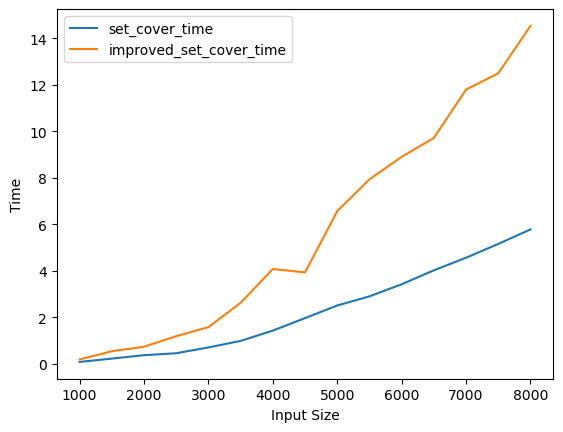

In [42]:
import matplotlib.pyplot as plt

plt.plot(set_time['Input Size'], set_time['Execution Time'], label='set_cover_time')
plt.plot(improved_set_time['Input Size'], improved_set_time['Execution Time'], label='improved_set_cover_time')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.legend()

plt.show()